# The Sparks Foundation-GRIP Sept2021

Ishasree Mukherjee

Data Science and Business Analytics Intern

# Task1: Prediction using supervised ML

We have to predict the perecntage of a student based on the number of study hours and also predict the score of a student if that student studied for 9.25 hours per day.

The dataset contains two varaibles: Hours and Scores. 

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Insert the dataset provided

In [2]:
dataset = "http://bit.ly/w-data"
data = pd.read_csv(dataset)
data.head() # to check the top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape  # to view the shape, which means the number of rows and columns

(25, 2)

To check for null values or any missing data present

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


To check for mean, standard deviation, minimum and maximum values, different quartiles

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


For visualization of the data

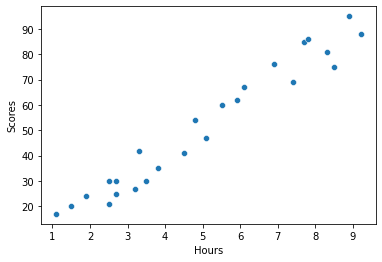

In [6]:
import seaborn as sns
sns.scatterplot(x=data["Hours"], y=data["Scores"]);  # to plot the data

From the above graph, we can clearly see that the relationship is linear.

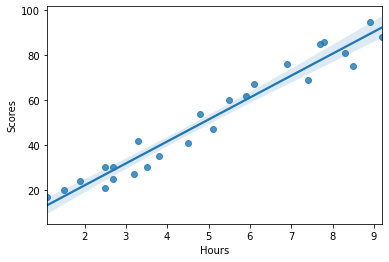

In [8]:
sns.regplot(x=data["Hours"], y=data["Scores"]); # presenting the regression plot 

To separate feature and target

In [21]:
x= data[["Hours"]]
y= data["Scores"]

Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

To build the model

In [24]:
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()

In [25]:
regressor.fit(train_x, train_y) # to train the model

LinearRegression()

finding the coefficient and intercept values of the regression

In [26]:
regressor.coef_, regressor.intercept_

(array([9.94167834]), 1.932204253151646)

In [27]:
pred_y = regressor.predict(val_x)


To compare actual and predicted values

In [28]:
pd.DataFrame({"Actual": val_y, "Predicted": pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


For Actual vs Predicted distribution plot

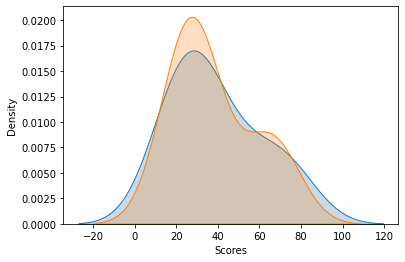

In [29]:
sns.kdeplot(pred_y, label="Predicted", shade= True);
sns.kdeplot(data= val_y, label="Actual", shade= True);

From the distribution plot, the orange line represents Actual and the blue line represents Predicted.

In [30]:
print("Train accuracy:", regressor.score(train_x, train_y), "Test accuracy:", regressor.score(val_x, val_y))

Train accuracy: 0.9484509249326872 Test accuracy: 0.9367661043365055


To predict the score of student studying 9.25 hours per day

In [31]:
h =[[9.25]]
s = regressor.predict(h)
print("A student who studies", h[0][0], "hours is estimated to score", s[0])

A student who studies 9.25 hours is estimated to score 93.89272889341655
